In [1]:
import math
import pandas as pd
from matplotlib import pyplot as plt
from opinionmining import *
from typing import Set

In [2]:
paths = []
for folder in os.listdir(full_path):
    try:
        for file in os.listdir(os.path.join(full_path, folder)):
            if str(file) != "Readme.txt" and str(file) != ".DS_Store":
                paths.append(os.path.join(full_path, folder, file))
    except NotADirectoryError:
        continue
paths[:3]

['/Users/jossinger/Dropbox/Studies/Bath_Artificial_Intelligence/Course Material/6_NLP/Programming/Submission/data/Reviews-9-products/norton.txt',
 '/Users/jossinger/Dropbox/Studies/Bath_Artificial_Intelligence/Course Material/6_NLP/Programming/Submission/data/Reviews-9-products/Nokia 6600.txt',
 '/Users/jossinger/Dropbox/Studies/Bath_Artificial_Intelligence/Course Material/6_NLP/Programming/Submission/data/Reviews-9-products/Hitachi router.txt']

In [3]:
SAVE = True
pwd = os.getcwd()
filename = "db.csv"
product_id = 1

if SAVE:
    db = ReviewDatabase(paths).dataframe.to_csv(os.path.join(pwd, filename))
    db = pd.read_csv(filename)
    database = db.where(db["Product_ID"] == product_id).copy().dropna()
else:
    db = pd.read_csv(filename)
    database = db.where(db["Product_ID"] == product_id).copy().dropna()


This sentence review does not split into two: ## To see a great little short film about this, go to ipodsdirtysecret.com  ##Basically, this is a disposable device, the idea being that when the battery goes out, you will buy the latest model of ipod.
'NoneType' object is not iterable
This sentence review does not split into two: ##The really neat thing about this is that the third party firmware are very powerful and add many more features to the WRT54G that are not there, but should be. ##However, the version of the WRT54G that Amazon.com and most other places sell is version 5.
'NoneType' object is not iterable
This sentence review does not split into two: ##Why did I wait so long?  detail[-1],color rendition[-1][cc]##If you're looking for a digital camera to replace your big Nikon or Canon SLR, forget it - film is still king when exquisite detail and fine color rendition are critical.
'NoneType' object is not iterable
This sentence review does not split into two: ##I am one of the ma

In [4]:
database["ExtractedCategories"] = database["Sentence"].apply(lambda x : FeatureExtraction.categories(x))
database.head()

,Unnamed: 0,Product_name,Product_ID,Review_ID,Sentence_ID,Sentence,gt_categories,gt_score,ExtractedCategories
0,0.0,norton,1.0,1.0,1.0,I have read the installation instructions for ...,"('software',)",-3.0,"[nis, installation, nav, junk, software, resul..."
1,1.0,norton,1.0,1.0,2.0,Why is it that I can install any other type of...,"('no sentiment',)",0.0,"[type, software]"
2,2.0,norton,1.0,1.0,3.0,But if I installed either one of these Norton ...,"('norton products',)",-3.0,"[installation, products]"
3,3.0,norton,1.0,1.0,4.0,"It can not be the computer or the owner, since...","('mcafee anti-virus 8',)",2.0,"[problems, mcafee, computer, virus, owner]"
4,4.0,norton,1.0,1.0,5.0,I have used Norton for the past 5 years and fo...,"('norton',)",-2.0,"[norton, software, years]"


What is the product?
What are the opinion categories?
What is the sentiment of the opinion categories?

In [5]:
#Create a copy of the database to perform feature extraction
category_table = database.loc[:,"Product_ID":"Sentence_ID"].copy()
# Perform Stemming on the sentences
category_table["Sentence"] = database.Sentence.apply(lambda x: FeatureExtraction.add_negations(x))
category_table["Stemmed_Sentence"] = category_table.Sentence.apply(lambda x: FeatureExtraction.stemming([x])[0])
# Remove the stop words
category_table["Clean_Sentence"] = category_table["Stemmed_Sentence"].apply(lambda x: FeatureExtraction.remove_stop([x])[0])

flattened_nouns = [item for sublist in database.ExtractedCategories for item in sublist]
frequency_sorted_nouns = [item for item, count in Counter(flattened_nouns).most_common()]
midpoint = len(frequency_sorted_nouns)//2
firsthalf = frequency_sorted_nouns[:midpoint]
secondhalf = frequency_sorted_nouns[midpoint:]



In [6]:
category_table

,Product_ID,Review_ID,Sentence_ID,Sentence,Stemmed_Sentence,Clean_Sentence
0,1.0,1.0,1.0,I have read the installation instructions for ...,i have read the instal instruct for both nis a...,read instal instruct nis nav prior instal end ...
1,1.0,1.0,2.0,Why is it that I can install any other type of...,whi is it that i can instal ani other type of ...,whi instal ani type softwar instal work proper
2,1.0,1.0,3.0,But if I installed either one of these Norton ...,but if i instal either one of these norton pro...,instal norton product work instal
3,1.0,1.0,4.0,"It can not NOT_be the computer or the owner , ...",it can not not_b the comput or the owner sinc ...,not_b comput owner sinc purchas mcafe anti vir...
4,1.0,1.0,5.0,I have used Norton for the past 5 years and fo...,i have use norton for the past year and for th...,use norton past year year softwar gotten disgrac
...,...,...,...,...,...,...
373,1.0,45.0,374.0,"Of course , if you try to reach Symantec custo...",of cours if you tri to reach symantec custom s...,cours tri reach symantec custom servic useless...
374,1.0,45.0,375.0,"Meanwhile , the damn alert is still popping up...",meanwhil the damn alert is still pop up everi ...,meanwhil damn alert pop everi second
375,1.0,45.0,376.0,"Finally I ran msconfig and went into the "" ser...",final i ran msconfig and went into the servic ...,final ran msconfig went servic tab uncheck eve...
376,1.0,45.0,377.0,"This time , it started the uninstallation proc...",this time it start the uninstal process then i...,time start uninstal process left work think wo...


The difficulty here is in mapping between effectively a many to one (through the process of stemming) to a one to one, where each category can be read as the most common form of that category.  Relies on explicitly stated product categories. 

Use unsupervised learning to match stemmed review topics to broader content topics
- do this by vectorizing the 

In [7]:
D = FeatureExtraction.fuzzy_match_categories(test_categories=secondhalf, target_categories=firsthalf)
transactions = list(map(lambda x: FeatureExtraction.fuzzy_match_categories(x, D), database.ExtractedCategories))
stemmed_transactions = list(map(lambda x: FeatureExtraction.stemming(x), transactions))
category_table["Stemmed_Transactions"] = stemmed_transactions
item_set = [lst for lst in stemmed_transactions if len(lst) != 0]
category_table.head()

,Product_ID,Review_ID,Sentence_ID,Sentence,Stemmed_Sentence,Clean_Sentence,Stemmed_Transactions
0,1.0,1.0,1.0,I have read the installation instructions for ...,i have read the instal instruct for both nis a...,read instal instruct nis nav prior instal end ...,"[ms, instal, nis, junk, softwar, result, instr..."
1,1.0,1.0,2.0,Why is it that I can install any other type of...,whi is it that i can instal ani other type of ...,whi instal ani type softwar instal work proper,"[time, softwar]"
2,1.0,1.0,3.0,But if I installed either one of these Norton ...,but if i instal either one of these norton pro...,instal norton product work instal,"[instal, product]"
3,1.0,1.0,4.0,"It can not NOT_be the computer or the owner , ...",it can not not_b the comput or the owner sinc ...,not_b comput owner sinc purchas mcafe anti vir...,"[problem, mcafe, comput, virus, one]"
4,1.0,1.0,5.0,I have used Norton for the past 5 years and fo...,i have use norton for the past year and for th...,use norton past year year softwar gotten disgrac,"[norton, softwar, star]"


Create the stemming dictionary the remaps the stemmed words to the most commonly occuring original word

In [8]:
stemming_tuples = []
stemming_dict = {}
for i, l in enumerate(transactions):
    lst = []
    for j, word in enumerate(l):
        original_word = word
        stemmed_word = stemmed_transactions[i][j]
        stemming_tuples.append((stemmed_word, original_word))
stemming_tuples = sorted(stemming_tuples, key= lambda x: x[0])

key_valuelists = {k : [] for k, v in stemming_tuples}
for (key, value) in stemming_tuples:
    try:
        current_list = key_valuelists.get(key)
        current_list.append(value)
        key_valuelists[key] = current_list
    except KeyError as e:
        print(e)
#
stemming_dict = {k: Counter(v).most_common(1)[0][0] for k, v in key_valuelists.items()}


There is now a way to map back the stemmed features to the legible features that can be used in describing the categories so we can proceed with the apriori algorithm on the stemmed features

In [9]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

d = item_set
te = TransactionEncoder()
te_ary = te.fit(d).transform(d)
df = pd.DataFrame(te_ary, columns = te.columns_)
frequent_items = apriori(df, min_support=0.01, use_colnames=True)
frequent_items

,support,itemsets
0,0.016760,(alarm)
1,0.011173,(amazon)
2,0.013966,(antispam)
3,0.058659,(antivirus)
4,0.033520,(com)
...,...,...
148,0.011173,"(antivirus, norton, secur)"
149,0.013966,"(pc, norton, internet)"
150,0.033520,"(norton, internet, secur)"
151,0.011173,"(internet, secur, systemwork)"


Feature Pruning

- features in the sets are not commutative 

In [10]:

doubles = []
def get_compact_phrases(frqt_words: List[set], test_sentences: List[List[str]], max_bounds = 4, min_bounds = 2):
    # for set check the set is within the bounds
    for s in frqt_words:
        if len(s) >= min_bounds and len(s) < max_bounds:
             # get the permutations of the set of words:
            compactness = test_compact_phrase(s, test_sentences)
            print(f"{compactness}\t{s}")
        
def create_permutations(frqt_set: set) -> List[list[str]]:
    return list(itertools.permutations(frqt_set,r=len(frqt_set)))

def compact_distance_between_consecutive_numbers_is_valid(lst:List[int], max_dist=3)->bool:
     # for each permutation calculate the distance between the words, if any of the numbers are larger than 3, continue
    for i in range(len(lst)-1):
        if lst[i+1] - lst[i] > max_dist:
            return False
    return True

def test_compact_phrase(phrase, sentences):
    set_words = set(phrase)
    compact_phrase_count = 0
    for sentence in sentences:
        if compact_phrase_count >= 2:
            return True
        sentence_str = sentence.split(" ")
        set_sentence = set(sentence_str)
        if set_words.issubset(set_sentence):
            indicies = [sentence_str.index(word) for word in set_words]
            is_compact = compact_distance_between_consecutive_numbers_is_valid(indicies)
            if is_compact:
                compact_phrase_count += 1
        else:
            continue
    return False

    
test_sents = list(category_table["Stemmed_Sentence"])
phrases = [phrs for phrs in frequent_items["itemsets"] if len(phrs) >= 2 and len(phrs) < 4]
single_phrases = [phrs for phrs in frequent_items["itemsets"] if len(phrs) < 2]
print(f"# of phrases : {len(phrases)}")
compact_phrases = [ph for ph in phrases if test_compact_phrase(ph, test_sents)]




# of phrases : 73


Phrase ordering voting. 

p-support of feature `ftr` is the number of sentences that `ftr` appears in as a noun or noun phrase, and these sentences must contain no feature phrase that is a superset of `ftr`

In [11]:
def get_supersets(single_phrase:set, compact_phrases:List[set])->List[set]:
    return [phrase for phrase in compact_phrases if single_phrase.issubset(compact_phrases)]

def is_valid_noun(ftr, nouns):
    for noun in nouns:
        if ftr == noun.text:
            return True
    return False
            

def count_sentence(ftr, sentence, feature_phrases):
    # count the number of times ftr appears as a noun 
    # where the sentence does not contain a feature phrase that also contains ftr
    sentence_str = sentence.split(" ")
    sentence_set = set(sentence_str)
    if ftr.issubset(sentence_set):
        doc = nlp(sentence)
        nouns = [token for token in doc if token.pos_ in ["NOUN", "PROPN"]]
        # check if the noun list contains a feature phrase with the same ftr
        super_sets = get_supersets(ftr, compact_phrases=feature_phrases)
        if any(super for super in super_sets if ftr.issubset(super)) and not is_valid_noun(ftr, nouns):
            return 0
        else:
            return 1
    return 0

def p_support_pruning(single_phrases:List[set], sentences:List[set], compact_phrases:List[set], threshold=3):
    p_support = [0] * len(single_phrases)
    for i, ftr in enumerate(single_phrases):
        for sentence in sentences:
            p_support[i] += count_sentence(ftr, sentence, compact_phrases)
    return [phrase for i, phrase in enumerate(single_phrases) if p_support[i] > threshold]
        
reduced_single_phrases = p_support_pruning( single_phrases=single_phrases, 
                                            sentences=test_sents, 
                                            compact_phrases=compact_phrases)
combined_features = reduced_single_phrases + compact_phrases

    

## Adjective Extraction
For each sentence in the review database, if it contains
any frequent feature, extract the nearby adjective. If
such an adjective is found, it is considered an opinion
word. A nearby adjective refers to the adjacent
adjective that modifies the noun/noun phrase that is a
frequent feature.


In [12]:
def in_features(word, features):
    for f in features:
        if set(word).issubset(f):
            return True
    return False

effective_opinion_sets = []

features = combined_features
sentences = category_table.Sentence.apply(lambda x: FeatureExtraction.clean_sentence(x))
opinion_words = []
feature_set = [word for feature in features for word in feature]
print(feature_set)
for i, sentence in enumerate(sentences):
    try:
        doc = nlp(sentence)
        sentence_set = set(token.text for token in doc)
        sentence_str = [token.text for token in doc]
        op_sets = []
        op_words = []
        for feature in features:
            if feature.issubset(sentence_set):
                feature_position = sentence_str.index(list(feature)[0])    
                adjectives = [(feature_position, feature, i, token) for i, token in enumerate(doc) if token.pos_ == "ADJ"]
                all_adjectives = [token.text for token in doc if token.pos_ == "ADJ"]
                valid_adjectives = [word for word in all_adjectives if not word in feature_set]
                op_words.append(valid_adjectives)
                op_sets.append(adjectives)
        effective_opinion_sets.append(set([tup for op in op_sets for tup in op if len(op) > 0]))
        opinion_words.append(set([w for op in op_words for w in op if len(op) > 0]))
    except Exception as e:
        print(f"Error processing sentence {i}: {e}")

category_table["Opinion_Words"] = opinion_words



def get_closest_adjective(ary_sets: Set[Tuple[int, frozenset, int, str]]) -> Set[Tuple[int, frozenset, int, str]]:
    if len(ary_sets) == 0:
        return set()
    # initialize a dictionary
    closest_sets = {}
    for feature_index, feature, adj_index, adj in ary_sets:
        if feature not in closest_sets:
            closest_sets[feature] = (float('inf'), None) 
        # clculate distance between feature and adjective in sentence
        distance = abs(feature_index - adj_index)
        if distance < closest_sets[feature][0]:
            closest_sets[feature] = (distance, (feature_index, feature, adj_index, adj))
    # return the closest adjective n_ary from the dictionary
    return set(value[1] for value in closest_sets.values() if value[1])


infreq_opinions = []
for i, opinion_set in enumerate(effective_opinion_sets):
    s = [t for t in nlp(sentences.to_list()[i])]
    closest_opinion_set = get_closest_adjective(opinion_set)
    op_set = set()
    if closest_opinion_set != set():
        for _, feature, i_adj, adj in closest_opinion_set:
            token = s[i_adj]
            if token.text == adj.text:
                if token.head.text in feature:
                    continue
                if token.head.pos_ == "NOUN":
                    op_set.add((adj.text, token.head.text))
    infreq_opinions.append(op_set)
category_table["Infrequent_Opinions"] = infreq_opinions



['alarm', 'amazon', 'antispam', 'antivirus', 'compani', 'compon', 'comput', 'cost', 'custom', 'definit', 'drive', 'edit', 'email', 'error', 'experi', 'featur', 'file', 'firewal', 'folder', 'help', 'home', 'hour', 'instal', 'instruct', 'internet', 'laptop', 'lot', 'mcafe', 'memori', 'minut', 'money', 'month', 'nis', 'norton', 'number', 'one', 'outlook', 'packag', 'past', 'pc', 'peopl', 'popup', 'problem', 'process', 'product', 'program', 'registri', 'review', 'secur', 'servic', 'site', 'softwar', 'star', 'subscript', 'support', 'symantec', 'system', 'systemwork', 'tech', 'thing', 'time', 'updat', 'user', 'version', 'virus', 'way', 'websit', 'window', 'work', 'antivirus', 'firewal', 'antivirus', 'internet', 'antivirus', 'norton', 'program', 'antivirus', 'antivirus', 'secur', 'comput', 'home', 'comput', 'nis', 'comput', 'problem', 'program', 'comput', 'comput', 'softwar', 'virus', 'definit', 'firewal', 'internet', 'norton', 'home', 'version', 'home', 'instal', 'problem', 'norton', 'intern

In [13]:
category_table.to_csv("category_table.csv")

Update the table with the frequent and infrequent opinons

In [14]:
import itertools

def phrase_voting(phrases, sentences):
    """
    Perform phrase voting on a given set of phrases that 
    returns the most commonly occuring permutation of a phrase in a set of setnences
    """
    phrase_dict = {k:list(itertools.permutations(k, len(k))) for k in phrases}
    max_perm_dict = {}
    for k, perms in phrase_dict.items():
        counts = [0] * len(perms)
        for sentence in sentences:
            sent_str = sentence.split(" ")
            if set(k).issubset(set(sent_str)):
                indexes = sorted([sent_str.index(word) for word in k if word in sent_str])
                ordered_words = [sent_str[i] for i in indexes]
                for i, perm in enumerate(perms):
                    if tuple(ordered_words) == perm:
                        counts[i] += 1
        max_count_index = counts.index(max(counts))
        max_perm_dict[k] = perms[max_count_index]
    return max_perm_dict

def map_transaction_tags(stemmed_sentences:List[str], frequent_features: List[Set]):
    sentence_tags = []
    permutation_dictionary = phrase_voting(frequent_features, stemmed_sentences)
    # iterate over the sentences, checking if any frequent feature is a subset of the stemmed sentences
    for i, sentence in enumerate(stemmed_sentences):
        feature_tags = []
        sentence_set, sentence_str = FeatureExtraction.deconstruct_sentence(sentence)
        for feature in frequent_features:
            if feature.issubset(sentence_set):
                feature = permutation_dictionary[feature]
                expanded_features = [stemming_dict[f] for f in feature]
                joined_feature = " ".join(expanded_features)
                feature_tags.insert(0, joined_feature)
        sentence_tags.append(feature_tags)
    return sentence_tags

In [15]:

def get_opinion_words(sentences, frequent_features):
    feature_set = set().union(*frequent_features)
    stemmer = SnowballStemmer("english")
    opinion_words = []
    effective_opinions = []

    for s in sentences:
        doc = nlp(s.lower())
        adjectives = set([token.text for token in doc if token.pos_ == "ADJ"])
        sentence_str = [word.text for word in doc]
        sentence_set = set(sentence_str)
        sentence_effective_adjectives = set()
        # for each feature extract the adjective that modifies the feature
        for ftr in frequent_features:
            if ftr.issubset(sentence_set):
                indexes = [sentence_str.index(f) for f in ftr]
                # find the token at the index and search its children for the adjective modifier
                for index in indexes:
                    for child in doc[index].children:
                        if child.dep_ == "amod" and stemmer.stem(child.text) not in feature_set:
                            sentence_effective_adjectives.add(child.text.replace("_", " "))

        valid_adjectives = set([stemmer.stem(word) for word in adjectives if stemmer.stem(word) not in feature_set])
        

        opinion_words.append(valid_adjectives)
        effective_opinions.append(sentence_effective_adjectives)

    return opinion_words, effective_opinions

S=category_table.Sentence.to_list()
opinion_words, effective_opinions = get_opinion_words(sentences=S, frequent_features=combined_features)


# Preprocessed Transaction Tags Table

In [16]:
# Store all the processed tags in a dataframe
transaction_tags = database.loc[:,"Product_ID":"Sentence"].copy()
transaction_tags["Clean_Sentences"] = category_table["Clean_Sentence"]
transaction_tags["Frequent_Features"] = map_transaction_tags(category_table["Clean_Sentence"].to_list(), combined_features)
# get the save file names of the products
grouped = db.groupby(["Product_ID", "Product_name"], as_index=False).first()
filenames =grouped[["Product_ID","Product_name"]]
save_filename = filenames.where(filenames["Product_ID"] == transaction_tags.Product_ID[0]).dropna()["Product_name"].values[0] + ".csv"
transaction_tags["Classes"] = database["gt_score"].apply(lambda x: 1 if x > 0 else -1 if x < 0 else 0)
transaction_tags["Opinion Words"] = opinion_words
transaction_tags["Effective_Opinions"] = effective_opinions
transaction_tags["Infrequent_Features"] = [[" ".join(x) for x in s] for s in infreq_opinions]


if SAVE:
    transaction_tags.to_csv(save_filename)

transaction_tags.head()


,Product_ID,Review_ID,Sentence_ID,Sentence,Clean_Sentences,Frequent_Features,Classes,Opinion Words,Effective_Opinions,Infrequent_Features
0,1.0,1.0,1.0,I have read the installation instructions for ...,read instal instruct nis nav prior instal end ...,"[software, nis, instructions, installation]",-1,{same},{},[prior installation]
1,1.0,1.0,2.0,Why is it that I can install any other type of...,whi instal ani type softwar instal work proper,"[work, software, installation]",0,{other},{},[]
2,1.0,1.0,3.0,But if I installed either one of these Norton ...,instal norton product work instal,"[norton product, work, product, norton, instal...",-1,{},{},[norton products]
3,1.0,1.0,4.0,"It can not be the computer or the owner, since...",not_b comput owner sinc purchas mcafe anti vir...,"[work, virus, mcafee, installation, computer]",1,{},{},[fine not_problems]
4,1.0,1.0,5.0,I have used Norton for the past 5 years and fo...,use norton past year year softwar gotten disgrac,"[software, past, norton]",-1,"{disgrac, more, last}",{},[past software]


# Pipeline 1 - Sentiment Based of Opinion Words and Effective Opinions
Determine Sentiment direction based off the direction of the sample paper

In [17]:
from textblob import TextBlob

def determine_sentiment_on_word_polarity(set_opinion_words, set_effective_opinions):
    # returns 1 if the polarity is positive, 0 if none, and -1 if negative
    opinion_word_score = 0
    effective_opinion_score = 0
    if set_opinion_words:
        for word in set_opinion_words:
            opinion_word_score += determine_polarity_with_negation(word)
    if set_effective_opinions:
        for word in set_effective_opinions:
            effective_opinion_score += determine_polarity_with_negation(word)
    # if the magnitude of the effective opinion score is greater than the opinion score, return whatever the polarity is
    if opinion_word_score == 0 and effective_opinion_score == 0:
        return 0
    if abs(opinion_word_score) < abs(effective_opinion_score):
        return 1 if effective_opinion_score > 0 else -1
    else:
        total = opinion_word_score + effective_opinion_score
        if total == 0:
            return 0
        else:
            return 1 if total > 0 else -1
    
def determine_polarity_with_negation(word):
    # if theres no word in the set, return 0
    if word is None:
        return 0
    # if the wordset contains a negation, determine the polarity of the word and invert value
    if "not " in word:
        word = word.replace("not", "")
        tb = TextBlob(word)
        polarity = tb.sentiment.polarity * -1
    else:
        # otherwise get the polarity of the word
        tb = TextBlob(word)
        polarity = tb.sentiment.polarity
    return polarity

# seperate out those sentences that are setiment bearing - they have opinion words or effective opinions that directly influence the nouns and noun phrases
df = transaction_tags.copy()
opinion_bearing_table = df[(df['Opinion Words'].apply(len) > 0) | (df['Effective_Opinions'].apply(len) > 0)]
op_words = opinion_bearing_table["Opinion Words"].values
ef_op_words = opinion_bearing_table["Effective_Opinions"].values

# perform the sentiment classification
opinion_bearing_table["Sentiment_Class"] = [determine_sentiment_on_word_polarity(op_words[i], ef_op_words[i]) for i in range(len(op_words))]

# save the file
if SAVE:
    file = "Pipeline1_" + save_filename   
    opinion_bearing_table.to_csv(file)
opinion_bearing_table.tail()


/var/folders/42/qsqz6yz9635dllwfh9y5csxm0000gn/T/ipykernel_24067/2624986959.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  opinion_bearing_table["Sentiment_Class"] = [determine_sentiment_on_word_polarity(op_words[i], ef_op_words[i]) for i in range(len(op_words))]


,Product_ID,Review_ID,Sentence_ID,Sentence,Clean_Sentences,Frequent_Features,Classes,Opinion Words,Effective_Opinions,Infrequent_Features,Sentiment_Class
372,1.0,45.0,373.0,On my own home computer.,home comput,"[home computer, home, computer]",0,{own},{},[],1
373,1.0,45.0,374.0,"Of course, if you try to reach Symantec custom...",cours tri reach symantec custom servic useless...,"[system, symantec, service, customer]",-1,{useless},{},[symantec service],-1
374,1.0,45.0,375.0,"Meanwhile, the damn alert is still popping up ...",meanwhil damn alert pop everi second,[],0,{damn},{},[],0
375,1.0,45.0,376.0,"Finally I ran msconfig and went into the ""serv...",final ran msconfig went servic tab uncheck eve...,"[symantec, service, norton]",0,"{uninstal, last}",{},"[norton service, symantec service]",0
377,1.0,45.0,378.0,"I simply hate Symantec. I swear, if I could ha...",simpli hate symantec swear physic rip softwar ...,"[software computer, symantec, software, computer]",-1,{bare},{},[symantec swear],1


## Pipeline_1 Evaluation

In [33]:
validations = opinion_bearing_table.Classes
predictions = opinion_bearing_table.Sentiment_Class
score = (validations == predictions).map(lambda x : 1 if x else 0)
print(f"accuracy: {save_filename} : {np.mean(score)}")
# cfm = confusion_matrix(validations, predictions)
# conf_matrix(validations, predictions, cfm)
# cfm

accuracy: norton.csv : 0.3729508196721312


# Pipeline_2 Supervised Model Approach with Naive Bayes

In [23]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import LeaveOneOut, cross_val_score, cross_val_predict

X = transaction_tags["Clean_Sentences"].where(transaction_tags.Classes != 0).dropna().to_list()
y = transaction_tags["Classes"].where(transaction_tags.Classes != 0).dropna().to_list()
pipe = Pipeline([('vectorizer', CountVectorizer(binary=True)), ('naivebayes', MultinomialNB())])
y_pred = cross_val_predict(pipe, X, y, cv=LeaveOneOut())
y_true = y


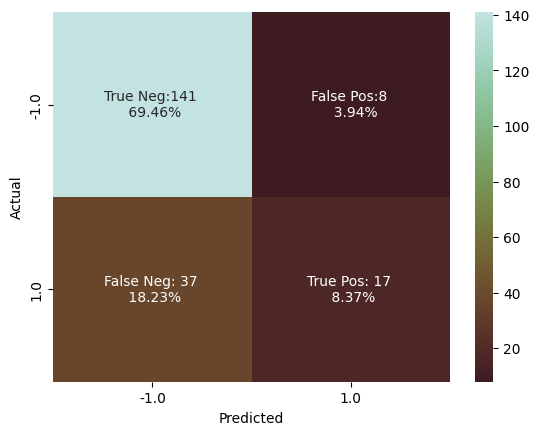

,Model,Accuracy,Precision,Recall,F1
0,Binary-Encoded Naive Bayes,0.778325,0.68,0.314815,0.43038


In [29]:
validations = y_true
predictions = y_pred
cfm = confusion_matrix(validations, predictions)
conf_matrix(validations, predictions, cfm)
display(accuracy_table(validations=validations, predictions=predictions, model_name="Binary-Encoded Naive Bayes"))